In [18]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import os


In [25]:
class Helper:
    
    def __init__(self, date_init="2014-01-01"):
        self._pairs = [
                { "name": "Bitcoin", "pair": "BTC" },
                { "name": "Ethereum", "pair": "ETH" },
                { "name": "Cardano", "pair": "ADA" },
                { "name": "Dogecoin", "pair": "DOGE" },
                { "name": "Ripple", "pair": "XRP" },
                { "name": "Dai", "pair": "DAI" },
                { "name": "Plkadot", "pair": "DOT" },
                { "name": "Polygon", "pair": "MATIC" },
                { "name": "Solana", "pair": "SOL" },
                { "name": "Binancecoin", "pair": "BNB" }
            ]
        self.date_init = date_init
        self.date_now = datetime.strftime(datetime.now(), "%Y-%m-%d")
        
    
    def __repr__(self):
        return f"{self.__class__}"
    
    
    @property
    def pairs(self):
        return self._pairs
    
    
    def validate_cryptocurrency(self, crypto):
        if isinstance(crypto, str) and len([pair for pair in self.pairs if crypto.upper() in pair.get('pair')]) != 0:
            return crypto
        return None
    
    
    def download(self, crypto):
        try:
            return yf.download(f"{crypto}-USD", self.date_init, self.date_now)
        except Exception as err:
            print(f"ERRROR {err}")
        
    
    def download_one_crypto(self, crypto):
        try:
            if self.validate_cryptocurrency(crypto):
                return self.download(crypto.upper())
        except Exception as err:
            print(f"ERRROR {err}")
            
    
    def download_all_crypto_dataframe(self):
        results = []
        for crypto in self.pairs:
            result = self.download_one_crypto(crypto.get('pair'))
            results.append(pd.DataFrame(result.Close).rename(columns = {'Close': crypto.get('name')}))
        return results

In [28]:
helper_crypto = Helper()

In [29]:
df_final = reduce(lambda left,right: pd.merge(left, right, on = 'Date', how = 'inner'), helper_crypto.download_all_crypto_dataframe())
df_final

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Bitcoin,Ethereum,Cardano,Dogecoin,Ripple,Dai,Plkadot,Polygon,Solana,Binancecoin
Date,,,,,,,,,,
2020-08-20,11878.372070,416.439789,0.133642,0.003459,0.292573,1.008374,2.900080,0.026709,3.208267,23.092575
2020-08-21,11592.489258,389.126343,0.123760,0.003393,0.280682,1.004969,2.875028,0.024932,2.943668,22.128994
2020-08-22,11681.825195,395.835144,0.125276,0.003442,0.286546,1.000185,4.484690,0.026151,3.020886,22.239820
2020-08-23,11664.847656,391.384491,0.121595,0.003414,0.285386,1.001674,3.967066,0.025308,3.322431,21.870842
2020-08-24,11774.595703,408.144196,0.124488,0.003418,0.289215,1.014410,4.602614,0.027981,3.344986,22.605852
...,...,...,...,...,...,...,...,...,...,...
2022-09-17,20127.576172,1469.741699,0.487156,0.062210,0.377004,1.000157,7.063627,0.829484,33.750778,279.249329
2022-09-18,19419.505859,1335.329102,0.447186,0.057520,0.358323,0.999366,6.445236,0.753422,31.059855,266.313171
2022-09-19,19544.128906,1377.541382,0.453504,0.058612,0.387073,0.999347,6.396911,0.766038,32.685303,272.069824


In [37]:
assert df_final.isnull().sum().sum() == 0

In [33]:
df_final.head()

,Bitcoin,Ethereum,Cardano,Dogecoin,Ripple,Dai,Plkadot,Polygon,Solana,Binancecoin
Date,,,,,,,,,,
2020-08-20,11878.372070,416.439789,0.133642,0.003459,0.292573,1.008374,2.900080,0.026709,3.208267,23.092575
2020-08-21,11592.489258,389.126343,0.123760,0.003393,0.280682,1.004969,2.875028,0.024932,2.943668,22.128994
2020-08-22,11681.825195,395.835144,0.125276,0.003442,0.286546,1.000185,4.484690,0.026151,3.020886,22.239820
2020-08-23,11664.847656,391.384491,0.121595,0.003414,0.285386,1.001674,3.967066,0.025308,3.322431,21.870842
2020-08-24,11774.595703,408.144196,0.124488,0.003418,0.289215,1.014410,4.602614,0.027981,3.344986,22.605852


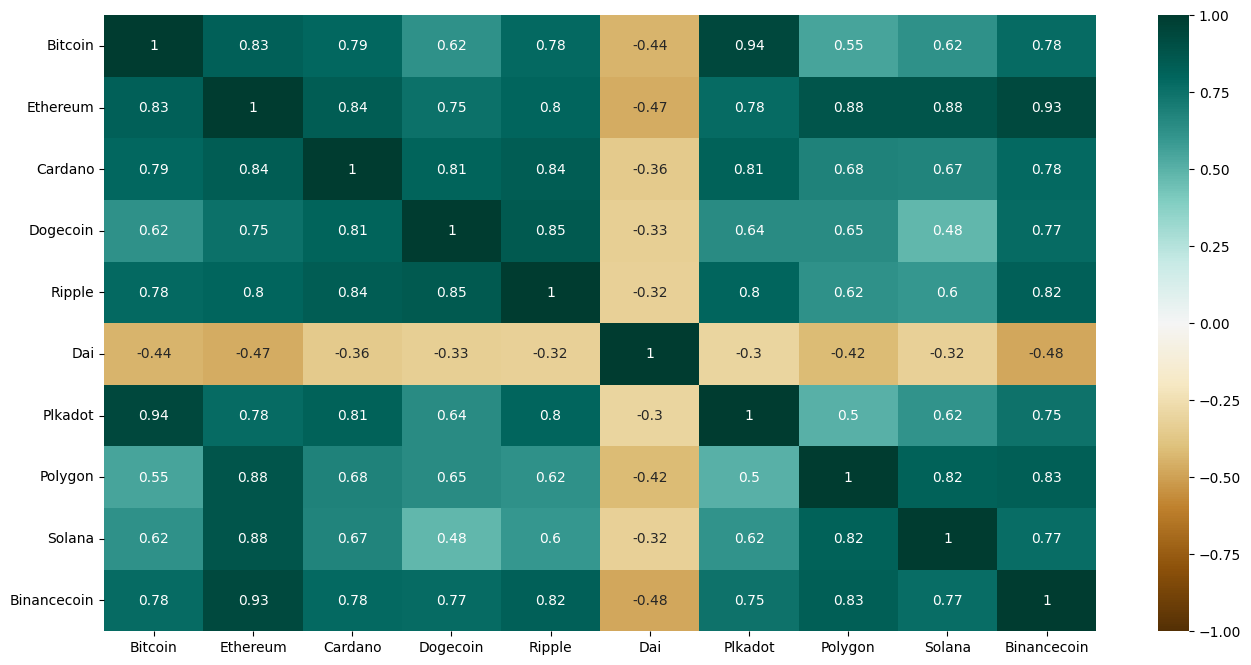

In [50]:
plt.figure(figsize = (16, 8))

sns.heatmap(df_final.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')


plt.savefig("tst.png")

In [1]:
for i in df_final.corr():
    print(i)

NameError: name 'df_final' is not defined

#### Salvar Data Frame com dados de fechamento de todas as criptomoedas

In [47]:
df_final.to_csv('corr.csv',index=False)


<AxesSubplot:>

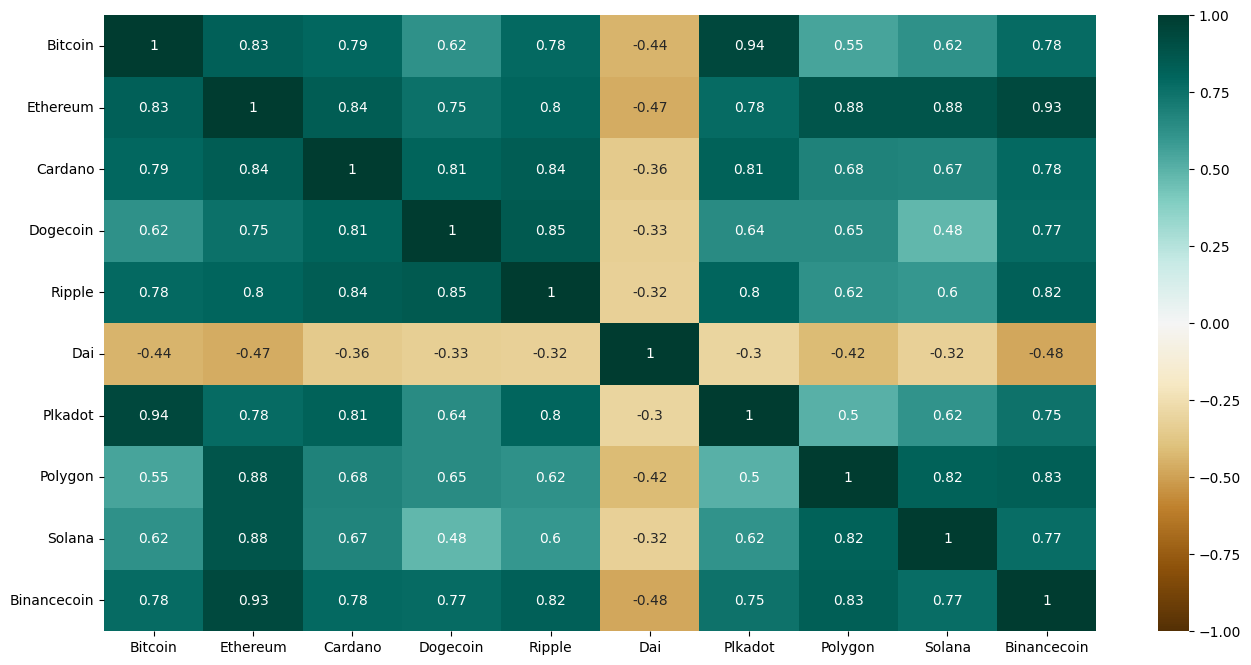

In [49]:
my_corr = pd.read_csv('corr.csv', delimiter=',')


plt.figure(figsize = (16, 8))

sns.heatmap(my_corr.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')